In [1]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

import os
import matplotlib.pyplot as plt
import numpy as np

import tensorflow_on_slurm 
from tensorflow_on_slurm import *


In [7]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

#f_pred = 'models/nn_pred_acc94_evts10000_12700-127-2.npy'
#f_hist = 'models/nn_hist_acc94_evts10000_12700-127-2.npy'

f_hist = './models/nn_hist_acc99_evts25000_127-100-80-40-20-2.npy'
f_pred = './models/nn_pred_acc99_evts25000_127-100-80-40-20-2.npy'

sArr = np.load(f_pred)#['arr_0']

x_true, y_true = sArr['x_true'], sArr['y_true']
x_reco, y_reco = sArr['x_reco'], sArr['y_reco']
x_pred, y_pred = sArr['x_pred'], sArr['y_pred']

nz1 = np.count_nonzero(x_true)
nz2 = np.count_nonzero(x_reco)
nz3 = np.count_nonzero(x_pred)

if (nz1 == 0 or nz2 == 0 or nz3 == 0): 
    
    print("Non-zero X True {0} / {1}".format(nz1, x_true.size))
    print("Non-zero X Reco {0} / {1}".format(nz2, x_reco.size))
    print("Non-zero X Pred {0} / {1}".format(nz3, x_pred.size))


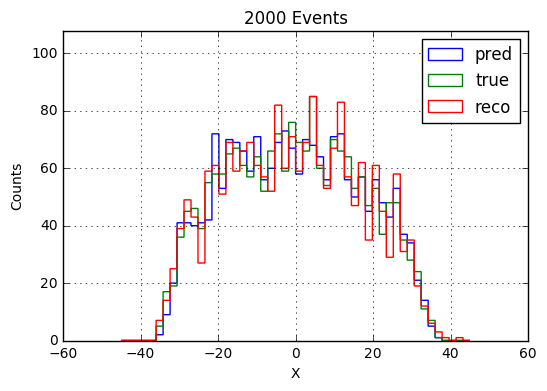

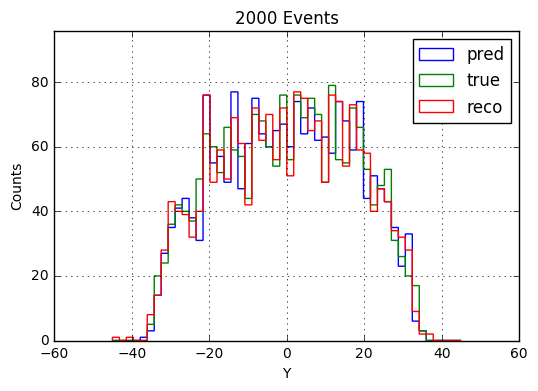

In [8]:

#------------------------------------------------------------------------------
# Position
#------------------------------------------------------------------------------

xbins = 50
xmax  = 45

plt.hist(x_pred, bins=xbins, range=[-xmax, xmax], label='pred', histtype='step')
plt.hist(x_true, bins=xbins, range=[-xmax, xmax], label='true', histtype='step')
plt.hist(x_reco, bins=xbins, range=[-xmax, xmax], label='reco', histtype='step')
plt.xlabel("X")
plt.ylabel("Counts")
plt.title("{0} Events".format(sArr.size))
plt.ylim([0, 1.2*plt.gca().get_ylim()[1]])
plt.legend()
plt.grid()

plt.figure()
plt.hist(y_pred, bins=xbins, range=[-xmax, xmax], label='pred', histtype='step')
plt.hist(y_true, bins=xbins, range=[-xmax, xmax], label='true', histtype='step')
plt.hist(y_reco, bins=xbins, range=[-xmax, xmax], label='reco', histtype='step')
plt.xlabel("Y")
plt.ylabel("Counts")
plt.title("{0} Events".format(sArr.size))
plt.ylim([0, 1.2*plt.gca().get_ylim()[1]])
plt.legend()
plt.grid()

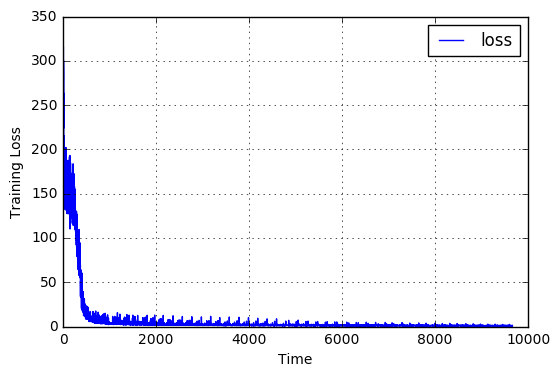

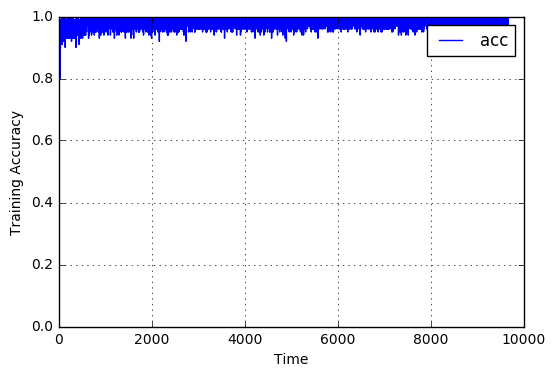

In [9]:

#------------------------------------------------------------------------------
# Training / Validation History
#------------------------------------------------------------------------------

arrHist = np.load(f_hist)

plt.figure()
plt.plot(arrHist[:,2], arrHist[:,0], label='loss')
plt.xlabel('Time')
plt.ylabel('Training Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(arrHist[:,2], arrHist[:,1], label='acc')
plt.xlabel('Time')
plt.ylabel('Training Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.grid()


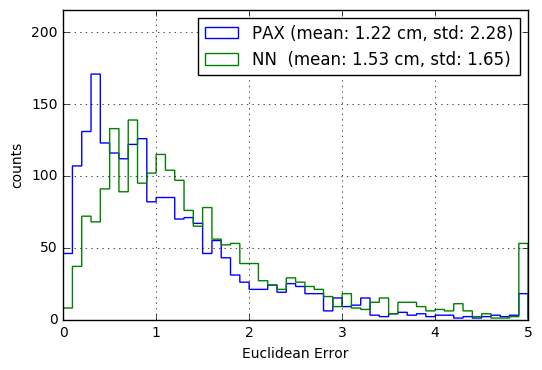

In [10]:

#------------------------------------------------------------------------------
# Euclidean Error
#------------------------------------------------------------------------------

dx_reco = x_true - x_reco
dy_reco = y_true - y_reco
dx_pred = x_true - x_pred
dy_pred = y_true - y_pred

dr2_reco      = np.sqrt(dx_reco**2 + dy_reco**2) 
dr2_pred      = np.sqrt(dx_pred**2 + dy_pred**2) 
dr2_reco_mean = np.mean(dr2_reco)
dr2_pred_mean = np.mean(dr2_pred)
dr2_reco_std  = np.std(dr2_reco)
dr2_pred_std  = np.std(dr2_pred)


#------------------------------------------------------------------------------
# Plot Error
#------------------------------------------------------------------------------

xmax=5

lbl_reco = "PAX (mean: {0:.2f} cm, std: {1:.2f})".format(dr2_reco_mean, dr2_reco_std)
lbl_pred = "NN  (mean: {0:.2f} cm, std: {1:.2f})".format(dr2_pred_mean, dr2_pred_std)

plt.hist(np.clip(dr2_reco, 0, xmax), bins=50, range=[0, xmax], histtype='step', label=lbl_reco)
plt.hist(np.clip(dr2_pred, 0, xmax), bins=50, range=[0, xmax], histtype='step', label=lbl_pred)

plt.xlabel("Euclidean Error")
plt.ylabel("counts")
#plt.title("{0} Train Events, {1} Test Events".format(0, arr.shape[0]))
plt.ylim([0, plt.gca().get_ylim()[1]*1.2])
plt.legend()
plt.grid()

